In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("No GPU available, switching to CPU.")

# Autoencoders

In [27]:
# (train_images, train_labels), (test_images,test_labels) = keras.datasets.mnist.load_data()
(train_images, train_labels), (test_images,test_labels) = keras.datasets.fashion_mnist.load_data()

train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype("float32")/255

0


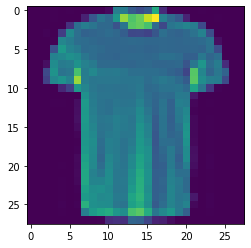

In [40]:
plt.imshow(train_images[1560])
print(train_labels[1560])

In [41]:
train_images.shape

(60000, 28, 28, 1)

In [42]:
# model = ???
input = keras.Input(shape=(28,28,1))

# encoder
x = layers.Conv2D(16,(3,3),activation="relu",padding="same", strides=2)(input)
x = layers.Conv2D(8,(3,3),activation="relu",padding="same", strides=2)(x)

x = layers.Flatten()(x)
x = layers.Dense(50,activation="relu")(x)
x = layers.Dense(7*7)(x)
x = layers.Reshape((7,7,1))(x)


# decoder
x = layers.Conv2DTranspose(8,3,activation="relu",padding="same",strides=2)(x)
x = layers.Conv2DTranspose(16,3,activation="relu",padding="same",strides=2)(x)
x = layers.Conv2D(1,3,activation="sigmoid",padding="same")(x)

outputs = x

model = keras.Model(input,outputs)
model.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 16)        160       
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 8)           1160      
                                                                 
 flatten_2 (Flatten)         (None, 392)               0         
                                                                 
 dense_4 (Dense)             (None, 50)                19650     
                                                                 
 dense_5 (Dense)             (None, 49)                2499      
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 1)           0   

In [43]:
(3*3)*16+1*16

160

In [44]:
28*28,7*7*8

(784, 392)

In [45]:
model.compile(
    loss = "mse",
    optimizer="adam",
    metrics=["accuracy"]
)

model.fit(
    train_images, train_images,
    shuffle=True,
    epochs=20,
    batch_size=512,
    validation_data = (test_images,test_images)
)

Epoch 1/20
118/118 [==============================] - 2s 14ms/step - loss: 0.1130 - accuracy: 0.4928 - val_loss: 0.0415 - val_accuracy: 0.4990
Epoch 2/20
118/118 [==============================] - 1s 12ms/step - loss: 0.0332 - accuracy: 0.5030 - val_loss: 0.0290 - val_accuracy: 0.5024
Epoch 3/20
118/118 [==============================] - 1s 12ms/step - loss: 0.0272 - accuracy: 0.5045 - val_loss: 0.0262 - val_accuracy: 0.5031
Epoch 4/20
118/118 [==============================] - 1s 12ms/step - loss: 0.0251 - accuracy: 0.5050 - val_loss: 0.0246 - val_accuracy: 0.5024
Epoch 5/20
118/118 [==============================] - 1s 12ms/step - loss: 0.0239 - accuracy: 0.5053 - val_loss: 0.0235 - val_accuracy: 0.5029
Epoch 6/20
118/118 [==============================] - 1s 12ms/step - loss: 0.0229 - accuracy: 0.5056 - val_loss: 0.0226 - val_accuracy: 0.5034
Epoch 7/20
118/118 [==============================] - 1s 12ms/step - loss: 0.0221 - accuracy: 0.5059 - val_loss: 0.0218 - val_accuracy: 0.5037

In [46]:
pred = model.predict(test_images)
pred.shape

313/313 [==============================] - 1s 2ms/step


(10000, 28, 28, 1)

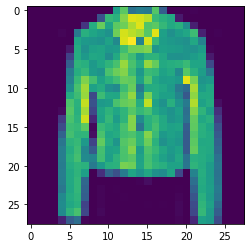

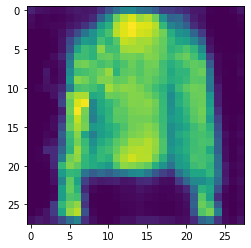

In [47]:
indx = 10
plt.figure()
plt.imshow(test_images[indx])
plt.figure()
plt.imshow(pred[indx])

In [48]:
def get_model(img_size, num_classes, first_conv_features, latent_space):
    inputs = keras.Input(shape=img_size)

    x = layers.Conv2D(first_conv_features, 3, strides=2, activation="relu", padding="same")(inputs)
    x = layers.Conv2D(first_conv_features//2, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(first_conv_features//4, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(first_conv_features//8, 3, activation="relu", padding="same")(x)
    # x = layers.Conv2D(128, 3, strides=2, activation="relu", padding="same")(x)
    # x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
    # x = layers.Conv2D(256, 3, strides=2, padding="same", activation="relu")(x)
    # x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)

    x = layers.Flatten()(x)
    x = layers.Dense(latent_space,activation="relu")(x)
    x = layers.Dense(14*14,activation="relu")(x)
    x = layers.Reshape((14,14,1))(x)

    # x = layers.Conv2DTranspose(256, 3, activation="relu", padding="same")(x)
    # x = layers.Conv2DTranspose(256, 3, activation="relu", padding="same", strides=2)(x)
    # x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same")(x)
    # x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same", strides=2)(x)
    x = layers.Conv2D(first_conv_features//8, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(first_conv_features//4, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(first_conv_features//2, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(first_conv_features, 3, activation="relu", padding="same", strides=2)(x)

    outputs = layers.Conv2D(num_classes, 3, activation="sigmoid", padding="same")(x)

    model = keras.Model(inputs, outputs)
    return model

model = get_model(img_size=train_images.shape[1:], num_classes=1,first_conv_features=64, latent_space=100)
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        640       
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 32)        18464     
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 16)        4624      
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 dense_6 (Dense)             (None, 100)               1569

In [49]:
model.compile(
    loss = "mse",
    optimizer="adam",
    metrics=["accuracy"]
)

model.fit(
    train_images, train_images,
    shuffle=True,
    epochs=20,
    batch_size=512,
    validation_data = (test_images,test_images)
)

Epoch 1/20
118/118 [==============================] - 5s 35ms/step - loss: 0.0731 - accuracy: 0.4978 - val_loss: 0.0306 - val_accuracy: 0.4966
Epoch 2/20
118/118 [==============================] - 4s 32ms/step - loss: 0.0258 - accuracy: 0.5034 - val_loss: 0.0227 - val_accuracy: 0.5028
Epoch 3/20
118/118 [==============================] - 4s 33ms/step - loss: 0.0217 - accuracy: 0.5050 - val_loss: 0.0210 - val_accuracy: 0.5019
Epoch 4/20
118/118 [==============================] - 4s 32ms/step - loss: 0.0197 - accuracy: 0.5059 - val_loss: 0.0189 - val_accuracy: 0.5036
Epoch 5/20
118/118 [==============================] - 4s 32ms/step - loss: 0.0186 - accuracy: 0.5063 - val_loss: 0.0178 - val_accuracy: 0.5048
Epoch 6/20
118/118 [==============================] - 4s 32ms/step - loss: 0.0175 - accuracy: 0.5066 - val_loss: 0.0177 - val_accuracy: 0.5053
Epoch 7/20
118/118 [==============================] - 4s 32ms/step - loss: 0.0165 - accuracy: 0.5070 - val_loss: 0.0159 - val_accuracy: 0.5050

In [50]:
indx =100

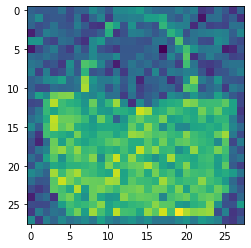

In [51]:
def add_noise(img,noise_factor):
    img_noise = np.copy(img) + noise_factor * tf.random.normal(shape=img.shape) 
    return img_noise

plt.imshow(add_noise(train_images[indx],0.2))

1/1 [==============================] - 0s 95ms/step


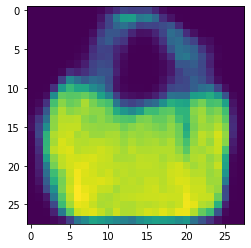

In [52]:
pred = model.predict(add_noise(train_images[indx:indx+1],0.2))
plt.imshow(pred[0])

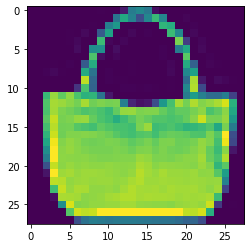

In [53]:
plt.imshow(train_images[indx])

In [54]:
for layer in model.layers:
    print(layer.name)
    if layer.name.startswith("dense"):
        new_model = keras.models.clone_model(keras.Model(model.input,layer.output))
        break

input_4
conv2d_13
conv2d_14
conv2d_15
conv2d_16
flatten_3
dense_6


In [55]:
new_model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        640       
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 32)        18464     
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 16)        4624      
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 dense_6 (Dense)             (None, 100)               1569

In [56]:
for model_l, new_model_l in zip(model.layers,new_model.layers):
    print(model_l.name,new_model_l.name)
    new_model_l.set_weights(model_l.get_weights())

input_4 input_4
conv2d_13 conv2d_13
conv2d_14 conv2d_14
conv2d_15 conv2d_15
conv2d_16 conv2d_16
flatten_3 flatten_3
dense_6 dense_6


1/1 [==============================] - 0s 16ms/step


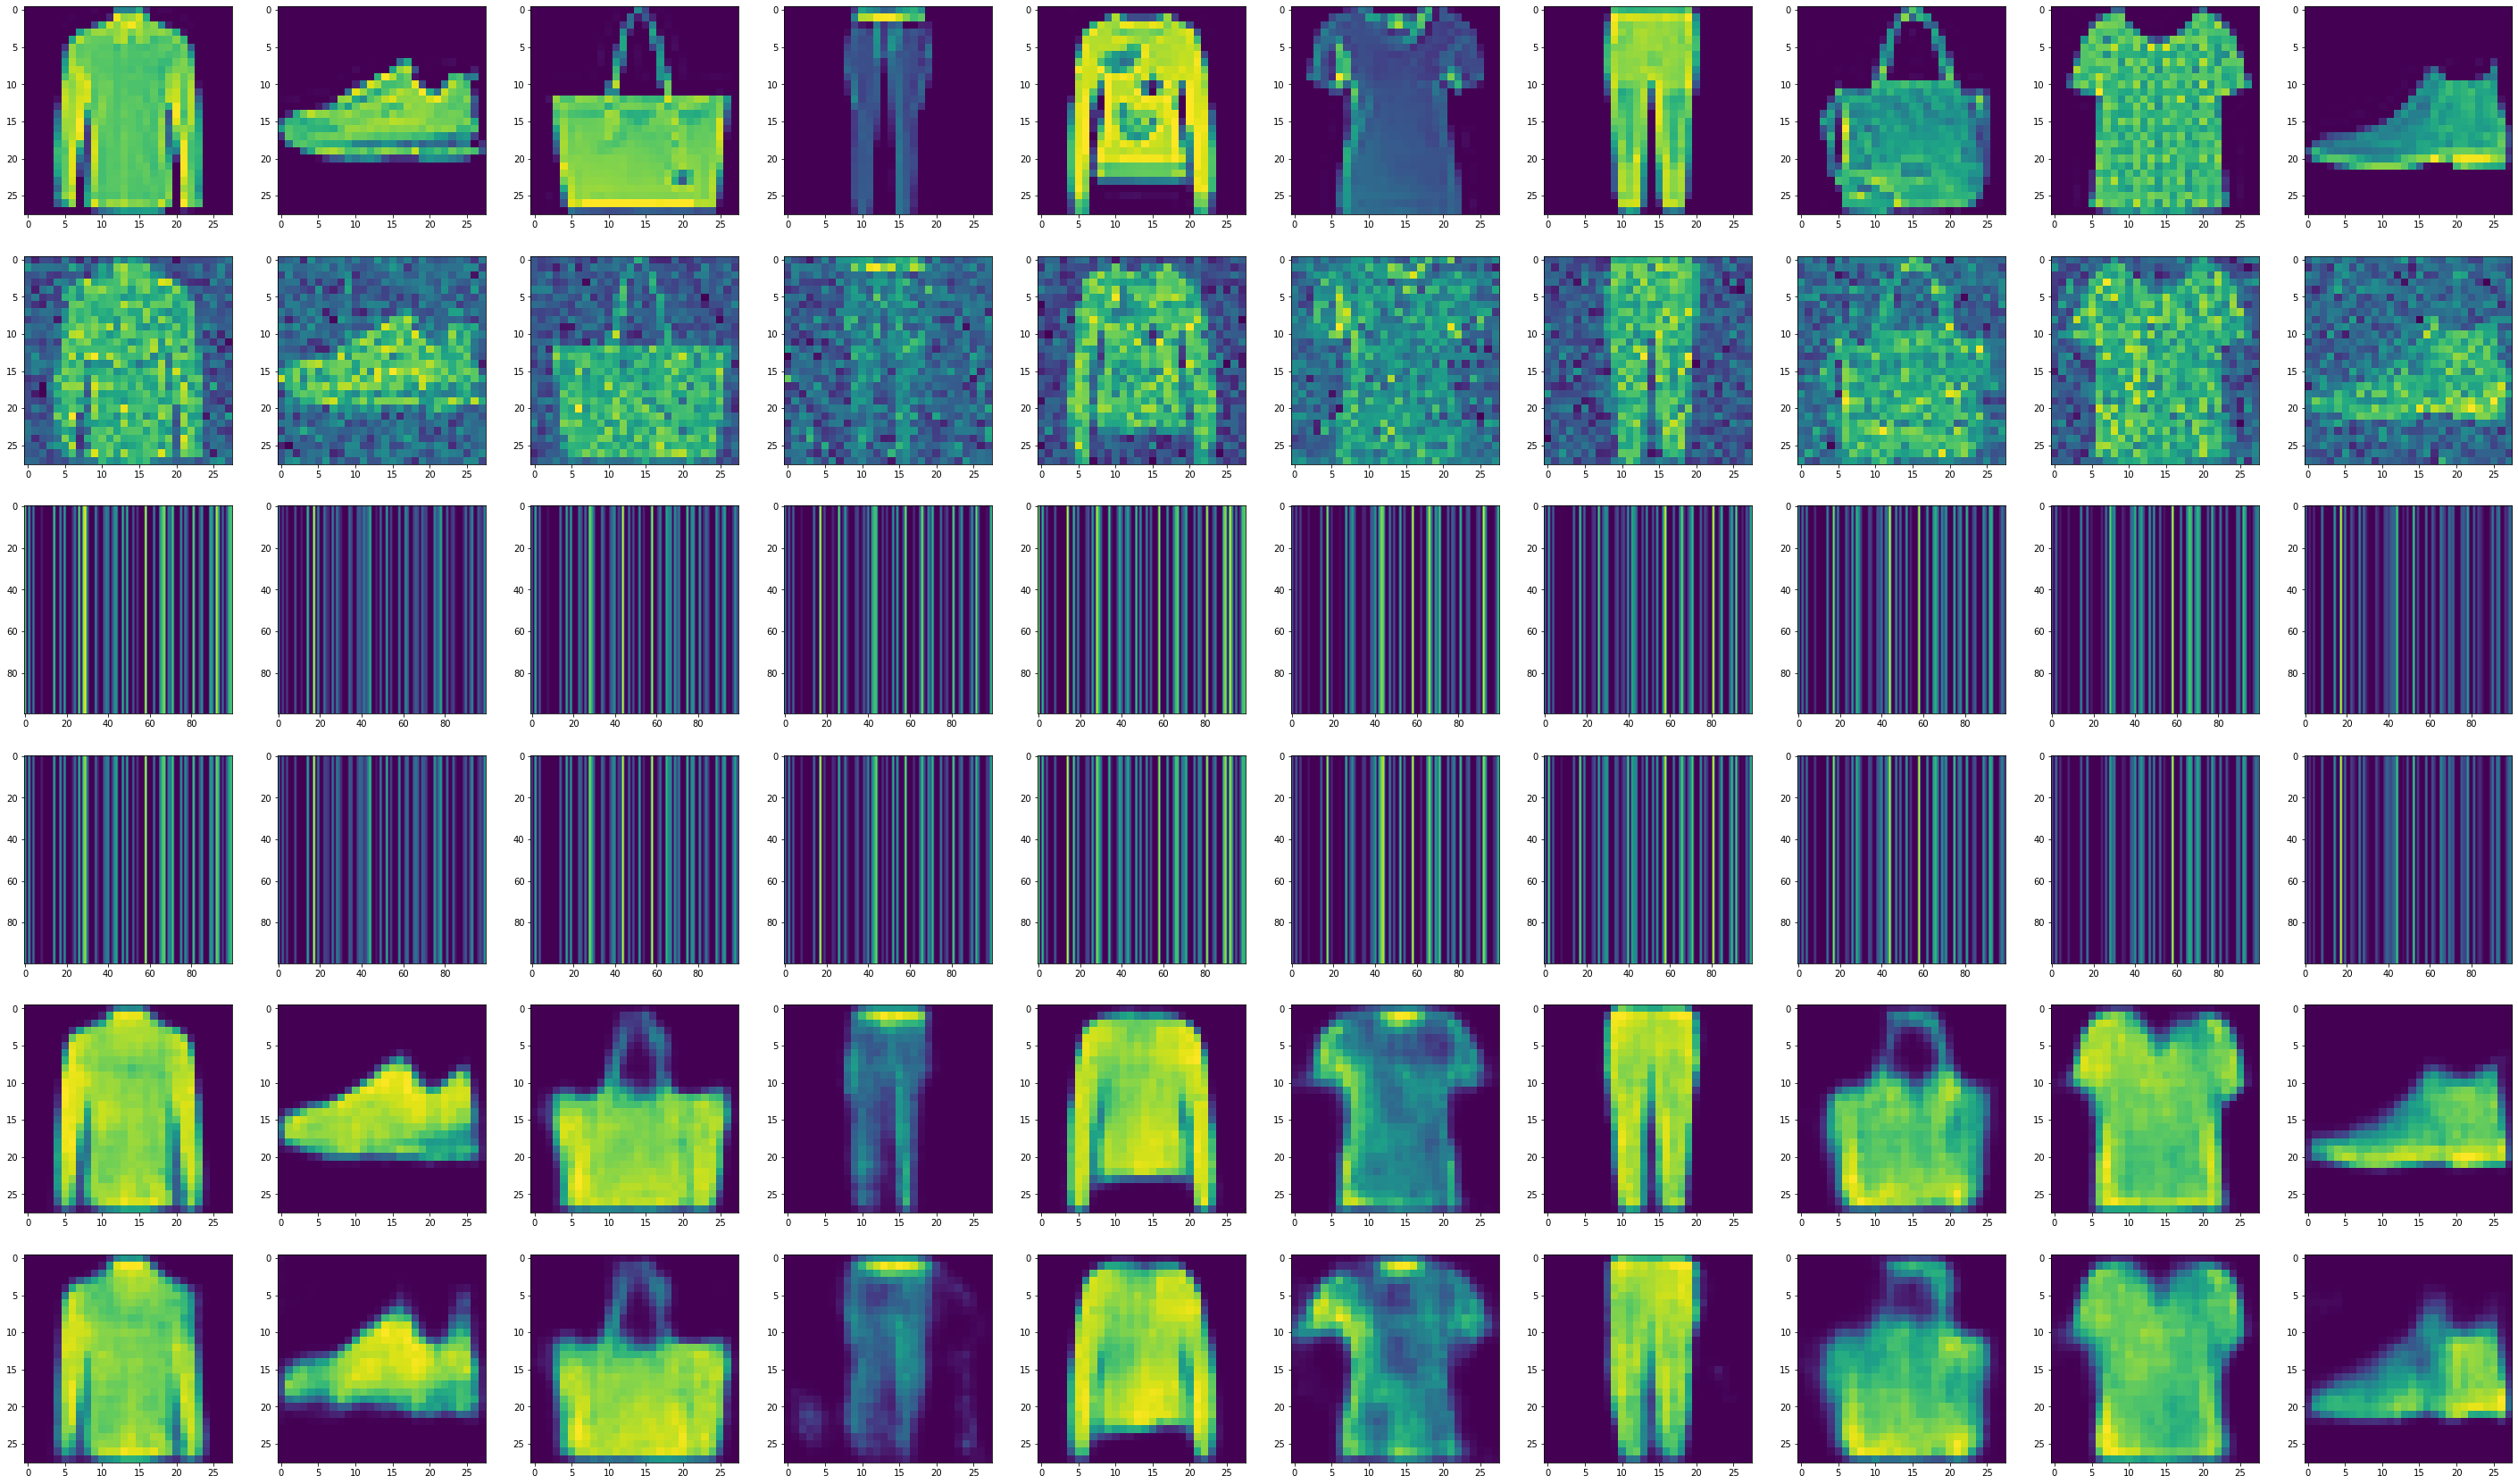

In [57]:
num_of_samples = 10
fig, axs = plt.subplots(6,num_of_samples,figsize=(5*num_of_samples,5*6))
activations = []
activations_noise = []
noise_factor = 0.2

for indx in range(0,test_images.shape[0],test_images.shape[0]//num_of_samples):
    # indx = 8600
    img = test_images[indx:indx+1,...]
    img_noise = add_noise(img,noise_factor) 
    img2 = new_model.predict(img)
    img2_noise = new_model.predict(img_noise)
    activations.append(img2)
    img3 = model.predict(img)
    img3_noise = model.predict(img_noise)
    # plt.figure()
    # plt.imshow(img[0,...])
    # print(img.shape,img2.shape)
    # plt.figure()
    # plt.imshow(img2)
    num_of_samples-=1
    axs[0,num_of_samples].imshow(img[0,...])
    axs[1,num_of_samples].imshow(img_noise[0,...])
    # axs[1,num_of_samples].imshow(img2)
    axs[2,num_of_samples].imshow(np.array(img2.tolist()*img2.shape[1]))
    axs[3,num_of_samples].imshow(np.array(img2_noise.tolist()*img2_noise.shape[1]))
    axs[4,num_of_samples].imshow(img3[0,...])
    axs[5,num_of_samples].imshow(img3_noise[0,...])
    if num_of_samples==0:
        break

In [1]:
import pandas as pd

In [2]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("No GPU available, switching to CPU.")

In [4]:
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()


,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [5]:
import sklearn
from sklearn.model_selection import train_test_split

labels  = raw_data[:,-1]

data = raw_data[:,0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(data,labels,test_size=0.2, random_state=21)

In [6]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data-min_val)/(max_val-min_val)
test_data = (test_data-min_val)/(max_val-min_val)

In [7]:
train_data = tf.cast(train_data,tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [8]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

abnormal_train_data = train_data[~train_labels]
abnormal_test_data = test_data[~test_labels]

Text(0.5, 1.0, 'A normal EKG')

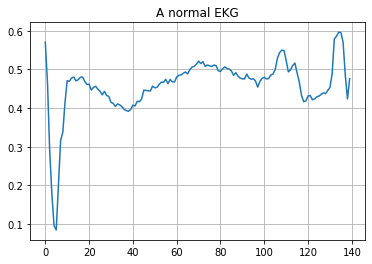

In [9]:
plt.grid()
plt.plot(np.arange(140),normal_train_data[0])
plt.title("A normal EKG")

Text(0.5, 1.0, 'A abnormal EKG')

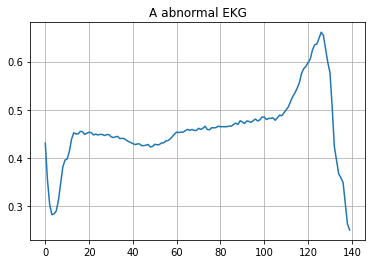

In [10]:
plt.grid()
plt.plot(np.arange(140),abnormal_train_data[0])
plt.title("A abnormal EKG")

In [11]:
class AbnormalEKGDetector(keras.Model):
    def __init__(self):
        super(AbnormalEKGDetector,self).__init__()
        self.encoder = keras.Sequential([
            layers.Dense(32,activation="relu"),
            layers.Dense(16, activation="relu"),
            layers.Dense(8,activation="relu")
        ])
        self.decoder = keras.Sequential([
            layers.Dense(16,activation="relu"),
            layers.Dense(32, activation="relu"),
            layers.Dense(140,activation="sigmoid")
        ])
    
    def call(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AbnormalEKGDetector()

In [12]:
autoencoder.compile(
    optimizer="adam",
    loss="mae"
)

In [13]:
history = autoencoder.fit(
    normal_train_data, normal_train_data,
    epochs = 20,
    batch_size = 512,
    validation_data = (test_data,test_data),
    shuffle = True
)

Epoch 1/20
5/5 [==============================] - 1s 35ms/step - loss: 0.0580 - val_loss: 0.0536
Epoch 2/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0568 - val_loss: 0.0526
Epoch 3/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0552 - val_loss: 0.0514
Epoch 4/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0528 - val_loss: 0.0503
Epoch 5/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0496 - val_loss: 0.0486
Epoch 6/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0461 - val_loss: 0.0465
Epoch 7/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0425 - val_loss: 0.0447
Epoch 8/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0391 - val_loss: 0.0428
Epoch 9/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0360 - val_loss: 0.0414
Epoch 10/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0333 - val_loss: 0.0401
Epoch 11/20
5/5 [=============

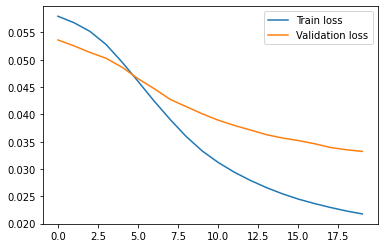

In [15]:
plt.plot(history.history["loss"],label="Train loss")
plt.plot(history.history["val_loss"],label="Validation loss")
plt.legend()

In [16]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

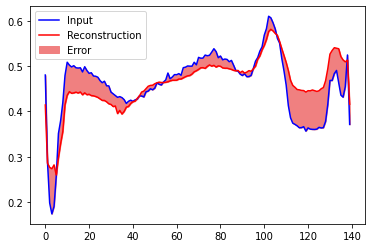

In [18]:
plt.plot(normal_test_data[0],"b")
plt.plot(decoded_data[0],"r")
plt.fill_between(np.arange(140),decoded_data[0],normal_test_data[0],color="lightcoral")
plt.legend(labels=["Input","Reconstruction","Error"])
plt.show()

In [20]:
encoded_data = autoencoder.encoder(abnormal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

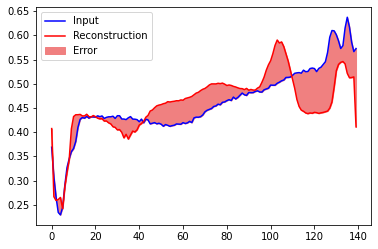

In [21]:
plt.plot(abnormal_test_data[0],"b")
plt.plot(decoded_data[0],"r")
plt.fill_between(np.arange(140),decoded_data[0],abnormal_test_data[0],color="lightcoral")
plt.legend(labels=["Input","Reconstruction","Error"])
plt.show()

74/74 [==============================] - 0s 3ms/step


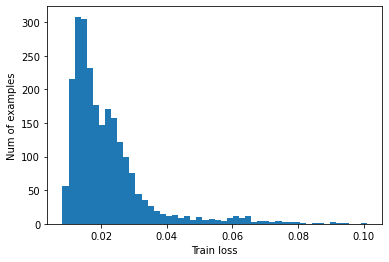

In [23]:
reconstruction = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstruction,normal_train_data)

plt.hist(train_loss[None,:],bins=50)
plt.xlabel("Train loss")
plt.ylabel("Num of examples")
plt.show()

In [24]:
threshold = 0.035
print("Threshold:",threshold)

Threshold: 0.035


14/14 [==============================] - 0s 11ms/step


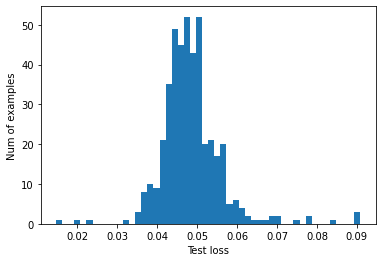

In [31]:
# data = test_data
data = abnormal_test_data
reconstruction = autoencoder.predict(data)
loss = tf.keras.losses.mae(reconstruction,data)

plt.hist(loss[None,:],bins=50)
plt.xlabel("Test loss")
plt.ylabel("Num of examples")
plt.show()

In [35]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

def predict(model,data,threshold):
    reconstruction = model(data)
    loss = tf.keras.losses.mae(reconstruction,data)
    return tf.math.less(loss,threshold)

def print_stats(prediction,labels):
    print(" Accuracy:",accuracy_score(labels,prediction))
    print("Precision:",precision_score(labels,prediction))
    print("   Recall:",recall_score(labels,prediction))

In [50]:
pred = predict(autoencoder,test_data, 0.036)
print_stats(pred,test_labels)

 Accuracy: 0.95
Precision: 0.9866412213740458
   Recall: 0.9232142857142858


In [38]:
len(abnormal_test_data),len(normal_test_data)

(440, 560)